<a href="https://colab.research.google.com/github/sriharsha1718/Cat-vs-Dog/blob/main/CatvsDog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

In [2]:
!kaggle datasets download -d salader/dogsvscats

dogsvscats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogsvscats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras import Sequential

In [5]:
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

test_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
def process(image, label):
  image = tf.cast(image/255, tf.float32)
  return image, label

train_ds = train_ds.map(process)
test_ds = test_ds.map(process)

In [7]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3),padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3),padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3),padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2, padding='valid'))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [8]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [9]:
model.fit(train_ds, epochs=15, validation_data=test_ds)

Epoch 1/15
625/625 [==============================] - 81s 117ms/step - loss: 0.6229 - accuracy: 0.6449 - val_loss: 0.5740 - val_accuracy: 0.6916
Epoch 2/15
625/625 [==============================] - 60s 96ms/step - loss: 0.4739 - accuracy: 0.7704 - val_loss: 0.4779 - val_accuracy: 0.7738
Epoch 3/15
625/625 [==============================] - 72s 115ms/step - loss: 0.3599 - accuracy: 0.8377 - val_loss: 0.5020 - val_accuracy: 0.7932
Epoch 4/15
625/625 [==============================] - 62s 99ms/step - loss: 0.2334 - accuracy: 0.9009 - val_loss: 0.7129 - val_accuracy: 0.7912
Epoch 5/15
625/625 [==============================] - 71s 113ms/step - loss: 0.1278 - accuracy: 0.9499 - val_loss: 0.8706 - val_accuracy: 0.7814
Epoch 6/15
625/625 [==============================] - 61s 97ms/step - loss: 0.0843 - accuracy: 0.9707 - val_loss: 0.9524 - val_accuracy: 0.7846
Epoch 7/15
625/625 [==============================] - 72s 115ms/step - loss: 0.0625 - accuracy: 0.9789 - val_loss: 1.1182 - val_accur

In [10]:
import cv2
import matplotlib.pyplot as plt

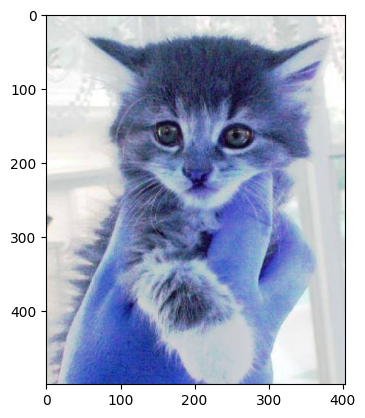

In [11]:
img = cv2.imread('/content/train/cats/cat.100.jpg')
plt.imshow(img)

In [12]:
test = cv2.resize(img, (256, 256))
test1=test.reshape((1,256,256,3))

In [13]:
model.predict(test1)

1/1 [==============================] - 0s 279ms/step


array([[0.]], dtype=float32)

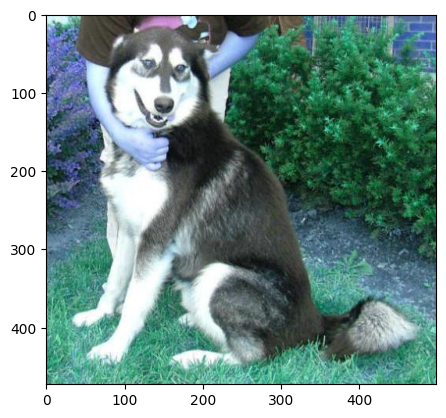

In [15]:
img1 = cv2.imread('/content/test/dogs/dog.10021.jpg')
plt.imshow(img1)

In [16]:
test = cv2.resize(img1, (256, 256))
test2=test.reshape((1,256,256,3))

In [17]:
model.predict(test2)

1/1 [==============================] - 0s 23ms/step


array([[1.]], dtype=float32)

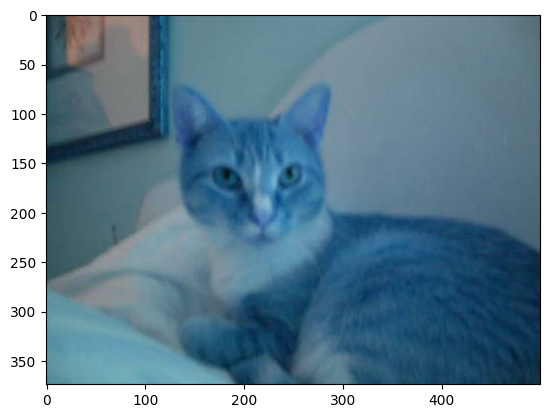

In [25]:
img2 = cv2.imread('/content/test/cats/cat.10183.jpg')
plt.imshow(img2)

In [26]:
test = cv2.resize(img2, (256, 256))
test3=test.reshape((1,256,256,3))

In [27]:
model.predict(test3)

1/1 [==============================] - 0s 26ms/step


array([[0.]], dtype=float32)